In [144]:
# !pip install tensorflow[and-cuda]
# !pip install pandas
# !pip install yfinance
# !pip install scikit-learn  
# !pip install plotly
# !pip install imblearn
# !pip install seaborn
# !pip install keras-tuner
#!pip install --upgrade nbformat


[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]


In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinancetool as yft
import techinal_indicato as ti
import model_logistic_regression as ml
import plots
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2,f_classif
import importlib
importlib.reload(ti)
importlib.reload(yft)
importlib.reload(ml)
importlib.reload(plots)



2024-08-13 02:06:46.731083: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-13 02:06:46.837718: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-13 02:06:46.877415: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-13 02:06:46.888306: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-13 02:06:46.959044: I tensorflow/core/platform/cpu_feature_guar

<module 'plots' from '/mnt/c/UH/DataScienceProject/code_last_good_v3/plots.py'>

##Pre-preocessing

In [216]:

importlib.reload(ti)
importlib.reload(yft)
importlib.reload(ml)
importlib.reload(plots)

# Set the download path for csv
basepath = "../data/"
yfh = yft.YFinanceHelper(basepath)
tih = ti.TechinalIndicatoHelper()

# Stock data download start date
sd = '2011-01-01'
# Stock data download end date
ed = '2023-12-31' #'1999-12-31'#'2023-12-31'

# Traning data start with sd to below date and remaning date will be used for testing
training_end_date_Str = '2021-12-31'


#appl
#"MSFT" #PFE, AAPL, MSFT, NVDA, AVGO (Broadcom Inc), ORCL

# Download dataset
stock_df_with_indecators_MSFT = tih.get_dataset(yfh,"MSFT",sd,ed,28)  # .apply_techinal_indicators(stock_df, 28)
stock_df_with_indecators_AAPL = tih.get_dataset(yfh,"AAPL",sd,ed,28)

stock_df_with_indecators_ORCL = tih.get_dataset(yfh,"ORCL",sd,ed,28)  # .apply_techinal_indicators(stock_df, 28)
stock_df_with_indecators_NVDA = tih.get_dataset(yfh,"NVDA",sd,ed,28)

stock_df_with_indecators_PFE = tih.get_dataset(yfh,"PFE",sd,ed,28)

stock_df_with_indecators_MARUTI = tih.get_dataset(yfh,"MARUTI.NS",sd,ed,28)


# Split data for traning for ml and test model after traning
training_stock_df_with_indecators_MSFT = stock_df_with_indecators_MSFT[(stock_df_with_indecators_MSFT['Date'] < pd.to_datetime(training_end_date_Str))]
testing_stock_df_with_indecators_MSFT = stock_df_with_indecators_MSFT[(stock_df_with_indecators_MSFT['Date'] >= pd.to_datetime(training_end_date_Str))]

training_stock_df_with_indecators_AAPL = stock_df_with_indecators_AAPL[(stock_df_with_indecators_AAPL['Date'] < pd.to_datetime(training_end_date_Str))]
testing_stock_df_with_indecators_AAPL = stock_df_with_indecators_AAPL[(stock_df_with_indecators_AAPL['Date'] >= pd.to_datetime(training_end_date_Str))]


training_stock_df_with_indecators_ORCL = stock_df_with_indecators_ORCL[(stock_df_with_indecators_ORCL['Date'] < pd.to_datetime(training_end_date_Str))]
testing_stock_df_with_indecators_ORCL = stock_df_with_indecators_ORCL[(stock_df_with_indecators_ORCL['Date'] >= pd.to_datetime(training_end_date_Str))]


training_stock_df_with_indecators_NVDA = stock_df_with_indecators_NVDA[(stock_df_with_indecators_NVDA['Date'] < pd.to_datetime(training_end_date_Str))]
testing_stock_df_with_indecators_NVDA = stock_df_with_indecators_NVDA[(stock_df_with_indecators_NVDA['Date'] >= pd.to_datetime(training_end_date_Str))]

training_stock_df_with_indecators_PFE = stock_df_with_indecators_PFE[(stock_df_with_indecators_PFE['Date'] < pd.to_datetime(training_end_date_Str))]
testing_stock_df_with_indecators_PFE = stock_df_with_indecators_PFE[(stock_df_with_indecators_PFE['Date'] >= pd.to_datetime(training_end_date_Str))]

training_stock_df_with_indecators_MARUTI = stock_df_with_indecators_MARUTI[(stock_df_with_indecators_MARUTI['Date'] < pd.to_datetime(training_end_date_Str))]
testing_stock_df_with_indecators_MARUTI = stock_df_with_indecators_MARUTI[(stock_df_with_indecators_MARUTI['Date'] >= pd.to_datetime(training_end_date_Str))]


##Class distribution

Text(0.5, 1.0, 'Class distribution')

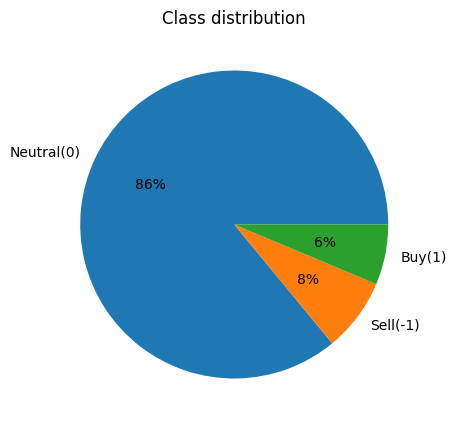

In [207]:

plt.figure(figsize=(5,5))
plt.pie(stock_df_with_indecators_MSFT['WMA VPT Signal'].value_counts(), labels=['Neutral(0)', 'Sell(-1)', 'Buy(1)'], autopct='%.0f%%') 
plt.title("Class distribution")

## Feature selection

Text(0.5, 1.0, 'F-Scores for Features using f_classif')

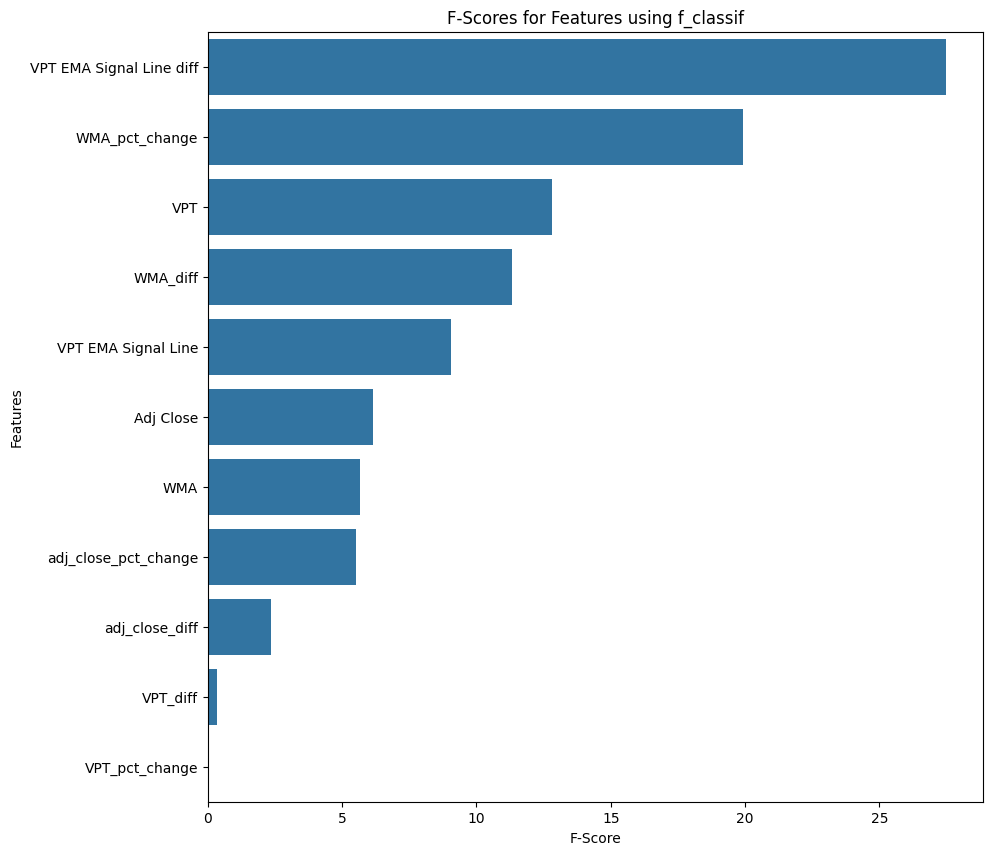

In [208]:
# Extracting features variable
X = stock_df_with_indecators_MSFT[['Adj Close','WMA','VPT','VPT EMA Signal Line','adj_close_diff','WMA_diff',"VPT_diff","VPT EMA Signal Line diff",'adj_close_pct_change', 'WMA_pct_change',"VPT_pct_change"]]#.drop(columns=['WMA Signal'])
# Exclude the target column
y = stock_df_with_indecators_MSFT['WMA VPT Signal']  # Target column

# Feature selection using SelectKBest with f_classif statistical test
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html
# For fearure can use differnt score func
selector = SelectKBest(score_func=f_classif,k='all')
X_selected = selector.fit(X, y)

# Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]

# Print the selected feature names
df_feature = pd.DataFrame()
df_feature["columns"]=X.columns
df_feature["scores"]=X_selected.scores_
df_feature= df_feature.sort_values(by=['scores'],ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(y=df_feature["columns"], x=df_feature["scores"])
plt.xlabel('F-Score')
plt.ylabel('Features')
plt.title("F-Scores for Features using f_classif")

## Visualize technical indicator

In [219]:
importlib.reload(plots)
plt_helper = plots.PlotHelper()
plt_helper.plot('MSFT','WMA Signal',testing_stock_df_with_indecators_MSFT)
plt_helper.plot_vpt('MSFT',testing_stock_df_with_indecators_MSFT)
plt_helper.plot('MSFT','WMA VPT Signal',testing_stock_df_with_indecators_MSFT)

vpt_profit, vpt_portfolio_value, vpt_profit_percentage = tih.calculate_profit(testing_stock_df_with_indecators_MSFT["Adj Close"],testing_stock_df_with_indecators_MSFT["WMA Signal"])
print("MSFT"+f" WMA Signal : Final Profit: ${vpt_profit:.2f}, {vpt_profit_percentage.round(2)}%")

vpt_profit, vpt_portfolio_value, vpt_profit_percentage = tih.calculate_profit(testing_stock_df_with_indecators_MSFT["Adj Close"],testing_stock_df_with_indecators_MSFT["VPT Signal"])
print("MSFT"+f" VPT Signal : Final Profit: ${vpt_profit:.2f}, {vpt_profit_percentage.round(2)}%")

vpt_profit, vpt_portfolio_value, vpt_profit_percentage = tih.calculate_profit(testing_stock_df_with_indecators_MSFT["Adj Close"],testing_stock_df_with_indecators_MSFT["WMA VPT Signal"])
print("MSFT"+f" WMA VPT Signal : Final Profit: ${vpt_profit:.2f}, {vpt_profit_percentage.round(2)}%")

MSFT WMA Signal : Final Profit: $1673.56, 16.74%
MSFT VPT Signal : Final Profit: $299.49, 2.99%
MSFT WMA VPT Signal : Final Profit: $278.94, 2.79%


# Model Treaning

In [323]:
importlib.reload(plots)

def print_profit(ticker_symbol,model_name, ml_obj ,model ,scaler,testing_stock,features):
# print the profit ai vs indicator   
    mode_signal = ml_obj.predict_signals(model,scaler,testing_stock,features)
   
    df = pd.DataFrame({
    'model': ["ML Model","ML Model","ML Model","Indicator","Indicator","Indicator"],
    'tread': ["buy","sell","neutral","buy","sell","neutral"],
    'count' : [mode_signal.value_counts()[1],mode_signal.value_counts()[-1],mode_signal.value_counts()[0],
             testing_stock["WMA VPT Signal"].value_counts()[1],testing_stock["WMA VPT Signal"].value_counts()[-1],testing_stock["WMA VPT Signal"].value_counts()[0]]

    })

    ax = sns.barplot(df, x="tread", y="count", hue="model", legend=True)
    for i in ax.containers:
        ax.bar_label(i,)
    plt.title(ticker_symbol + " : Tread Singal, Indicator vs "+model_name)
    plt.show()

   

    vpt_profit, vpt_portfolio_value, vpt_profit_percentage = tih.calculate_profit(testing_stock["Adj Close"],testing_stock["WMA VPT Signal"])
    print(ticker_symbol+f" WMA VPT Signal : Final Profit: ${vpt_profit:.2f}, {vpt_profit_percentage.round(2)}%")
    
    print()
    lstm_profit, lstm_portfolio_value, lstm_profit_percentage = tih.calculate_profit(testing_stock["Adj Close"][1:],mode_signal)
    print(ticker_symbol+ " "+ model_name+ f" Signal : Final Profit: ${lstm_profit:.2f}, {lstm_profit_percentage.round(2)}%")
    
    df_profit_price = pd.DataFrame({
    'model': ["ML Model","Indicator"],
    'type': ["Profit($)","Profit($)"],
    'count' : [lstm_profit.round(2),vpt_profit.round(2)]

    })

   

    df_profit_pct = pd.DataFrame({
    'model': ["ML Model","Indicator"],
     'type': ["Profit(%)","Profit(%)"],
    'count' : [lstm_profit_percentage.round(2),vpt_profit_percentage.round(2)]

    })

    
    

    ax1= sns.barplot(data = df_profit_price, x="type", y="count", hue="model", legend=True)
    for i in ax1.containers:
        ax1.bar_label(i,)
    plt.title(ticker_symbol + " : Tread Singal, Indicator vs "+model_name)
    #axes[0].set_ylim([0, 100])
    ax1.set_title("Profit($)")
    plt.show()

    ax2 = sns.barplot(data = df_profit_pct, x="type", y="count", hue="model", legend=True)
    for i in ax2.containers:
        ax2.bar_label(i,)
    plt.title(ticker_symbol + " : Tread Singal, Indicator vs "+model_name)
    ax.set_ylim([0, 100])
    ax2.set_title("Profit(%)")
    plt.show()
    if(len(mode_signal.values)<len(testing_stock)) :
        mode_signal = pd.concat([pd.Series([0]), mode_signal])

    testing_stock[ticker_symbol + " "+ model_name] = mode_signal.values
    plt_helper.plot(ticker_symbol,ticker_symbol + " "+model_name,testing_stock)

    sns.lineplot(data=lstm_portfolio_value)
    plt.show()

## LogisticRegression

   Train Accuracy  Test Accuracy  Precission   Recall       f1
0          0.1469        0.13536     0.46640  0.70070  0.46334
1          0.1469        0.13536     0.46640  0.70070  0.46334
2          0.1469        0.13536     0.46640  0.70070  0.46334
3          0.1469        0.13536     0.46640  0.70070  0.46334
4          0.1469        0.13536     0.36775  0.34783  0.34564


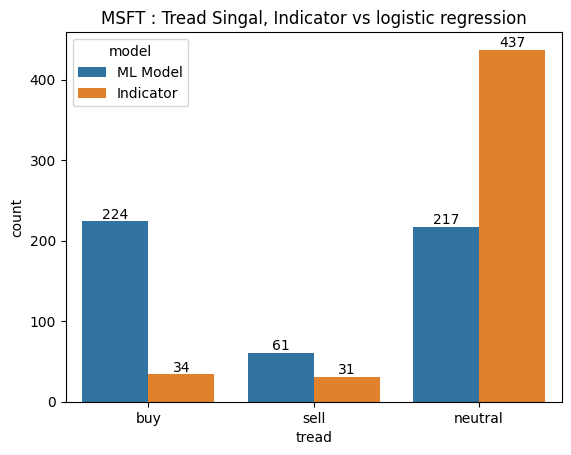

MSFT WMA VPT Signal : Final Profit: $278.94, 2.79%

MSFT logistic regression Signal : Final Profit: $5622.99, 56.23%


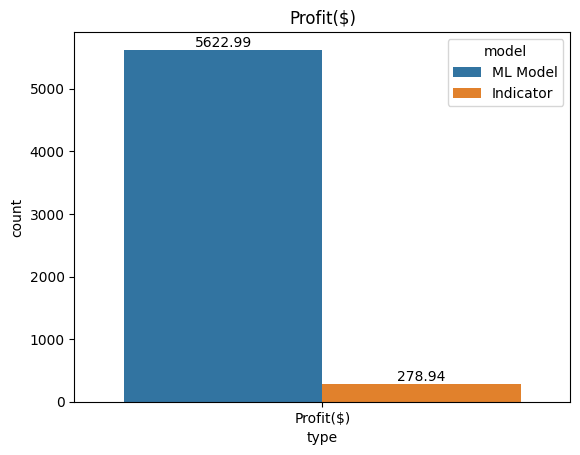

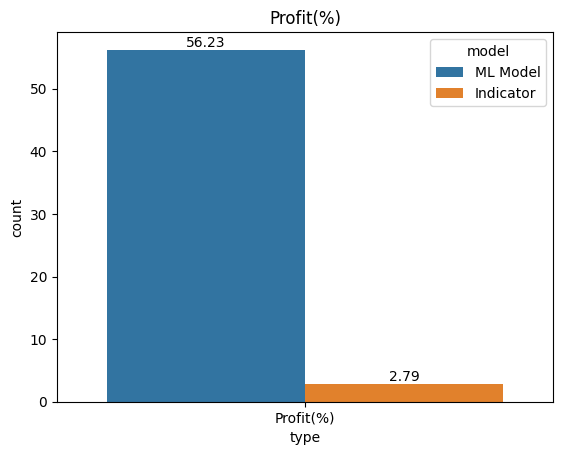

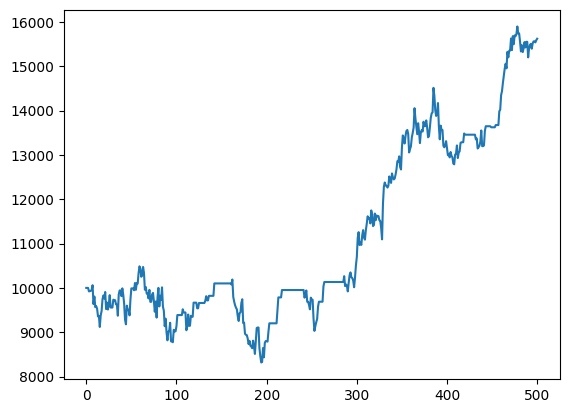

In [324]:

importlib.reload(ml)
# Feature columns
features = ["WMA_pct_change","VPT EMA Signal Line diff",'adj_close_pct_change']
# Target column
target = "WMA VPT Signal"
# Create Helper class object for LogisticRegression
ml_lr =  ml.LogisticRegressionHelper()
# Train the model
lr_models, scaler = ml_lr.train_logistic_regression_model(training_stock_df_with_indecators_MSFT,features,target)
print_profit("MSFT","logistic regression",ml_lr,lr_models[1],scaler,testing_stock_df_with_indecators_MSFT,features)

## GradientBoostClassifier

Best parameters: {'learning_rate': 0.01, 'max_depth': 12, 'n_estimators': 150}
Mean Squared Error after tuning: 0.2678132678132678
Train Accuracy: 0.74934
Test Accuracy: 0.73219
Precission: 0.38081
Recall: 0.57189
f1: 0.40413


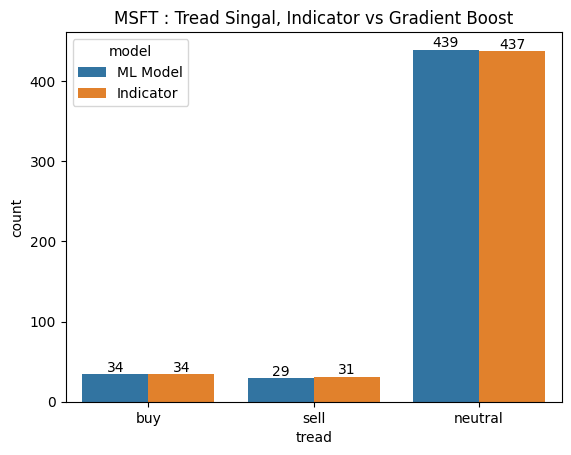

MSFT WMA VPT Signal : Final Profit: $278.94, 2.79%

MSFT Gradient Boost Signal : Final Profit: $546.66, 5.47%


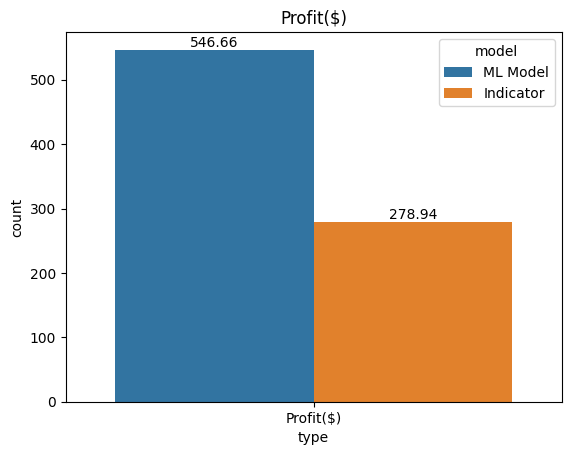

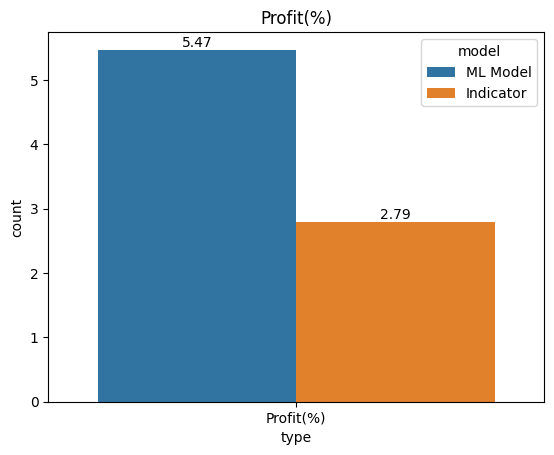

In [203]:

importlib.reload(ml)
# Feature columns
features = ["WMA_pct_change","VPT EMA Signal Line diff",'adj_close_pct_change']
# Target column
target = "WMA VPT Signal"
ml_gb =  ml.GradientBoostClassifierHelper()
gb_models, scaler = ml_gb.train_gradient_classifier_model(training_stock_df_with_indecators_MSFT,features,target)
print_profit("MSFT","Gradient Boost",ml_gb,gb_models,scaler,testing_stock_df_with_indecators_MSFT,features)

## LSTM

class_weights_dict {0: 0.4206493777376069, 1: 0.0392268650490162, 2: 0.5401237572133769}
Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - loss: 0.0731 - precision: 0.5145 - recall: 0.0329 - val_loss: 1.0782 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.0688 - precision: 0.4969 - recall: 0.0175 - val_loss: 1.0260 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0648 - precision: 0.7888 - recall: 0.0499 - val_loss: 0.9997 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0630 - precision: 0.9008 - recall: 0.0528 - val_loss: 0.9857 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 2.5000e-04
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0624 - precision: 0.8067 - recall: 0.0638 - val_lo

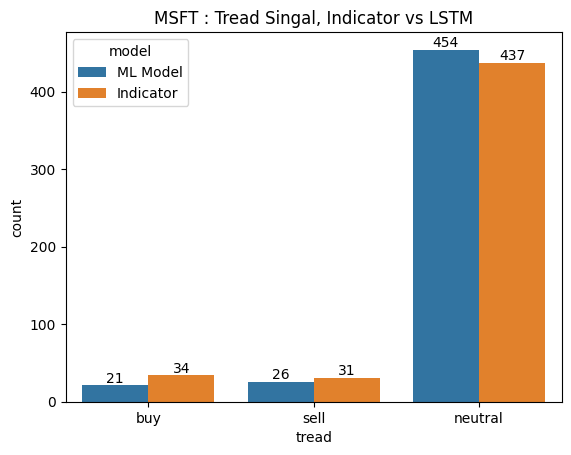

MSFT WMA VPT Signal : Final Profit: $278.94, 2.79%

MSFT LSTM Signal : Final Profit: $1616.63, 16.17%


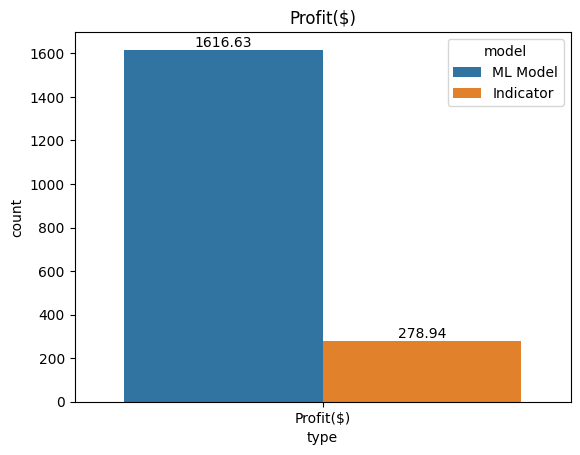

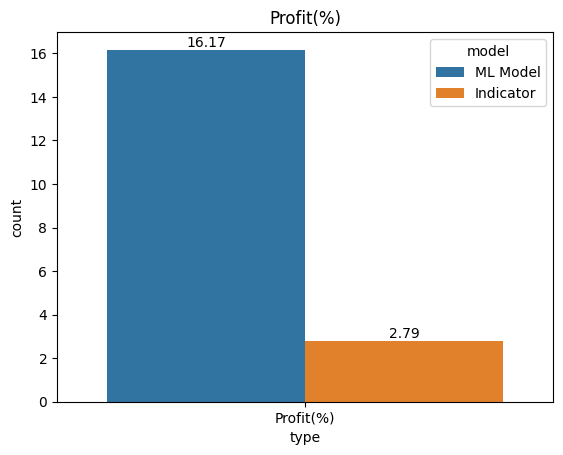

Hello World!


In [322]:
importlib.reload(ml)
from sklearn.preprocessing import StandardScaler,MinMaxScaler
ml_lstm = ml.LongShortTermMemoryMLHelper()
#'adj_close_diff', 'WMA_diff',"VPT_diff","RSI_diff"
features = ["WMA_pct_change","VPT EMA Signal Line diff",'adj_close_pct_change']
target = "WMA VPT Signal"
time_step = 15
ml_lstm.dataset1=[]
ml_lstm.add_dataset_under_sample("MSFT",training_stock_df_with_indecators_MSFT,features,target,time_step)
# ml_lstm.add_dataset_under_sample("ORCL",training_stock_df_with_indecators_ORCL,features,target,time_step)
# ml_lstm.add_dataset_under_sample("AAPL",training_stock_df_with_indecators_AAPL,features,target,time_step)
# ml_lstm.add_dataset_under_sample("NVDA",training_stock_df_with_indecators_NVDA,features,target,time_step)
# ml_lstm.add_dataset_under_sample("PFE",training_stock_df_with_indecators_PFE,features,target,time_step)
# ml_lstm.add_dataset_under_sample("MARUTI",training_stock_df_with_indecators_MARUTI,features,target,time_step)

#print_profit("MSFT","LSTM",ml_gb,gb_models,scaler,testing_stock_df_with_indecators_MSFT,features)
lstm_models, scaler = ml_lstm.train_lstm_model(["MSFT"],features,target,time_step)
print_profit("MSFT","LSTM",ml_lstm,lstm_models,scaler,testing_stock_df_with_indecators_MSFT,features)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


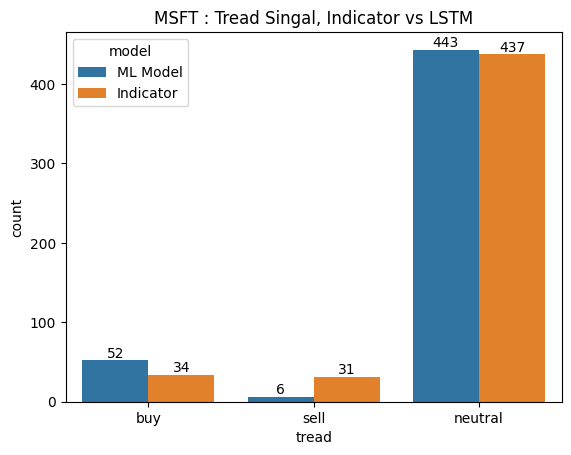

MSFT WMA VPT Signal : Final Profit: $278.94, 2.79%

MSFT LSTM Signal : Final Profit: $1947.69, 19.48%


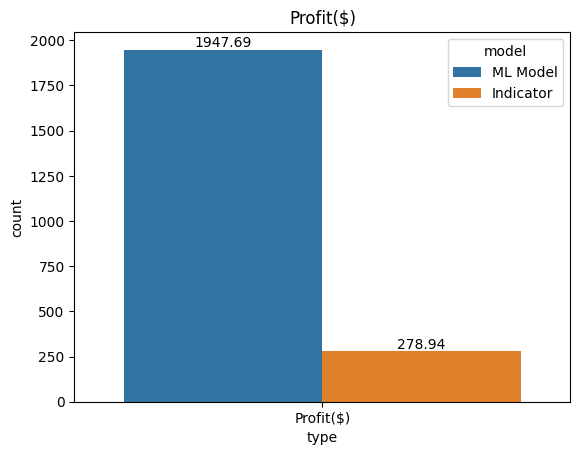

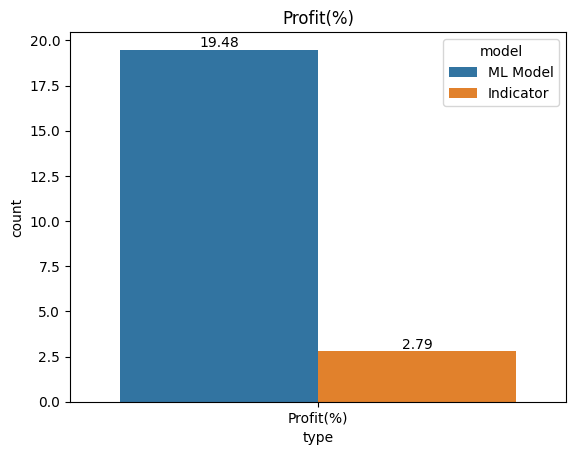

Hello World!


In [317]:
lstm_signal_MSFT = ml_lstm.predict_signals(lstm_models,scaler,testing_stock_df_with_indecators_MSFT,features)
print("MSFT LSTM signals")
print(lstm_signal_MSFT.value_counts())
print()
print(testing_stock_df_with_indecators_MSFT["WMA VPT Signal"].value_counts())

# testing_stock_df_with_indecators["LSTM Signal"] = 0
# testing_stock_df_with_indecators["LSTM Signal"][1:] = lstm_signal
print()
vpt_profit, vpt_portfolio_value, vpt_profit_percentage = tih.calculate_profit(testing_stock_df_with_indecators_MSFT["Adj Close"],testing_stock_df_with_indecators_MSFT["WMA VPT Signal"])
print(f"MSFT WMA VPT Signal : Final Profit: ${vpt_profit:.2f}, {vpt_profit_percentage.round(2)}%")

print()
lstm_profit, lstm_portfolio_value, lstm_profit_percentage = tih.calculate_profit(testing_stock_df_with_indecators_MSFT["Adj Close"][1:],lstm_signal_MSFT)
print(f"MSFT LSTM Signal : Final Profit: ${lstm_profit:.2f}, {lstm_profit_percentage.round(2)}%")


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
MSFT LSTM signals
 0    488
 1     12
-1      1
Name: count, dtype: int64

WMA VPT Signal
 0    437
 1     34
-1     31
Name: count, dtype: int64

MSFT WMA VPT Signal : Final Profit: $278.94, 2.79%

MSFT LSTM Signal : Final Profit: $2435.64, 24.36%
